Tamanho do conjunto de treino: (800, 7)
Tamanho do conjunto de teste: (200, 7)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia do modelo híbrido: 19.00%
              precision    recall  f1-score   support

           0       0.19      0.31      0.24        48
           1       0.15      0.17      0.16        47
           2       0.20      0.23      0.22        52
           3       0.30      0.06      0.10        53

    accuracy                           0.19       200
   macro avg       0.21      0.19      0.18       200
weighted avg       0.21      0.19      0.18       200



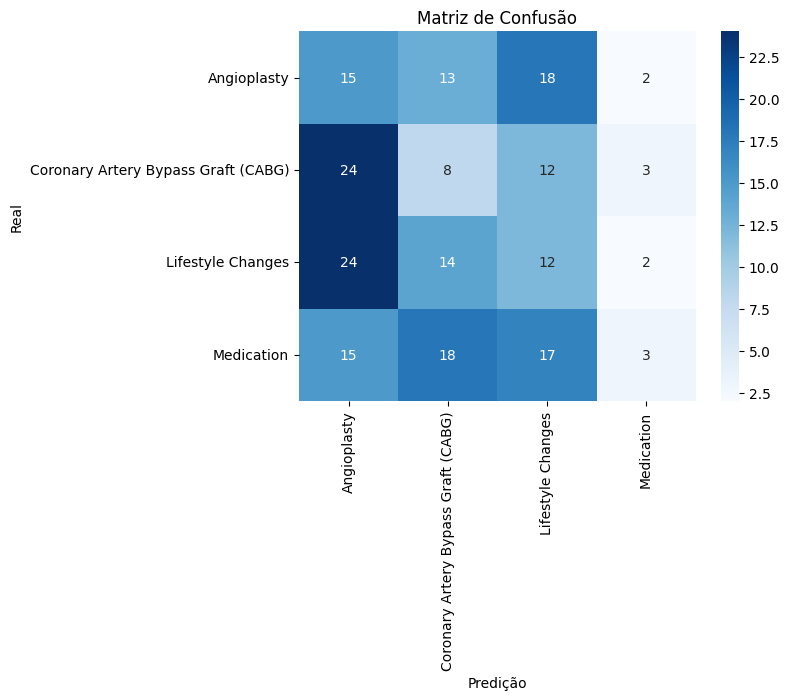

In [1]:
# Importando as bibliotecas

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Importação e leitura do dataset AtaqueCardiaco
df = pd.read_csv('/content/datasetAtaqueCardiaco.csv')

df.head()

# MODELO HIBRIDO

# Verificar os dados faltantes
df.isnull().sum()

# Substituir valores ausentes (se houver) ou eliminando colunas com dados ausentes
df = df.dropna()

# Codificar variáveis categóricas com LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0
df['Has Diabetes'] = label_encoder.fit_transform(df['Has Diabetes'])  # Yes=1, No=0
df['Smoking Status'] = label_encoder.fit_transform(df['Smoking Status'])  # Never=0, Current=1, etc.
df['Chest Pain Type'] = label_encoder.fit_transform(df['Chest Pain Type'])  # Codificando tipos de dor
df['Treatment'] = label_encoder.fit_transform(df['Treatment'])  # Tratamentos como variável alvo

# Visualizar as primeiras linhas após o pré-processamento
df.head()

# Definir as variáveis independentes (X) e dependente (y)
X = df.drop('Treatment', axis=1)  # Removendo a coluna 'Treatment' para ser a variável alvo
y = df['Treatment']  # Variável alvo

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar as dimensões dos dados de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# Definir os modelos base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Criar o modelo híbrido com VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('logistic_regression', lr_model)
], voting='hard')  # 'hard' significa votação por maioria

# Treinar o modelo híbrido
ensemble_model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = ensemble_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo híbrido: {accuracy * 100:.2f}%")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()